In [1]:
import os
import pickle
import sys
import time

import numpy as np
from pprint import pprint
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc, build_default_source
from lenstronomy.Util import data_util
from lenstronomy.SimulationAPI.ObservationConfig.Roman import Roman
from hydra import initialize, compose
from pyHalo.preset_models import CDM

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses import sample_skypy_lens
from mejiro.helpers import pandeia_input
from mejiro.plots import diagnostic_plot, plot
from mejiro.utils import util

In [2]:
array_dir = os.path.join(array_dir, 'sample_skypy_lens')

pickle_dir = os.path.join(pickle_dir, 'pyhalo')
util.create_directory_if_not_exists(pickle_dir)

In [3]:
lens = sample_skypy_lens.SampleSkyPyLens()

In [4]:
# realizationCDM = CDM(lens.z_lens, lens.z_source, cone_opening_angle_arcsec=11, LOS_normalization=0.0)
# print(f'Realization contains {len(realizationCDM.halos)} halos.')

In [5]:
# # pickle it
# with open(os.path.join(pickle_dir, 'cdm_subhalos_for_sample_skypy_lens'), 'ab') as results_file:
#         pickle.dump(realizationCDM, results_file)

In [6]:
# unpickle to reproduce plots
with open(os.path.join(pickle_dir, 'cdm_subhalos_for_sample_skypy_lens'), 'rb') as results_file:
        realizationCDM = pickle.load(results_file)

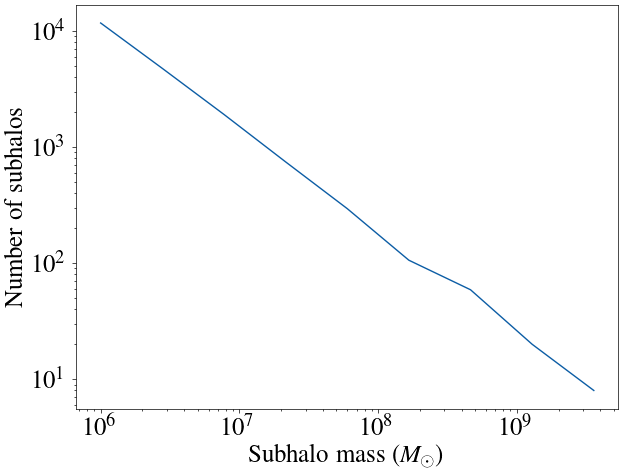

In [7]:
cdm_halo_masses = [halo.mass for halo in realizationCDM.halos]
N, m = np.histogram(cdm_halo_masses, bins=np.logspace(6, 10, 10))

# fontsize = 18
# matplotlib.rcParams.update({'font.size': fontsize})

fig = plt.figure(1)
ax = plt.subplot(111)
ax.loglog(m[0:-1], N)
ax.set_xlabel('Subhalo mass ('+r'$M_{\odot}$)')
ax.set_ylabel('Number of subhalos')

fig.savefig(os.path.join(figure_dir, 'shmf.png'))

In [8]:
print(realizationCDM.astropy_instance)

FlatLambdaCDM(H0=67.5 km / (Mpc s), Om0=0.309, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=0.049)
